In [38]:
# Importing Packages
from astropy.io import fits
#-----------------------------------
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit

# Part 1: Data Processing and Extraction

## Step 1

[[992. 990. 991. ... 994. 993. 993.]
 [991. 991. 991. ... 994. 993. 991.]
 [991. 991. 991. ... 994. 994. 993.]
 ...
 [990. 989. 987. ... 990. 991. 991.]
 [989. 989. 988. ... 992. 992. 990.]
 [988. 987. 988. ... 991. 991. 990.]]


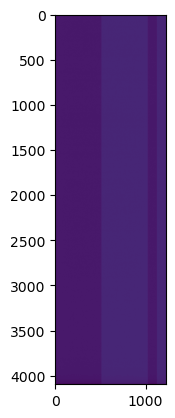

In [39]:
# Opening and stacking Bias
bias100 = fits.open('../data/RotationCurve/r100.fits')
bias101 = fits.open('../data/RotationCurve/r101.fits')
bias102 = fits.open('../data/RotationCurve/r102.fits')
bias103 = fits.open('../data/RotationCurve/r103.fits')
bias104 = fits.open('../data/RotationCurve/r104.fits')
bias105 = fits.open('../data/RotationCurve/r105.fits')
bias106 = fits.open('../data/RotationCurve/r106.fits')
bias107 = fits.open('../data/RotationCurve/r107.fits')
bias108 = fits.open('../data/RotationCurve/r108.fits')
bias109 = fits.open('../data/RotationCurve/r109.fits')
bias110 = fits.open('../data/RotationCurve/r110.fits')
bias111 = fits.open('../data/RotationCurve/r111.fits')
bias112 = fits.open('../data/RotationCurve/r112.fits')
bias113 = fits.open('../data/RotationCurve/r113.fits')
bias114 = fits.open('../data/RotationCurve/r114.fits')

b1, b2, b3, b4, b5 = bias100[0].data, bias101[0].data, bias102[0].data, bias103[0].data, bias104[0].data

b6, b7, b8, b9, b10 = bias105[0].data, bias106[0].data, bias107[0].data, bias108[0].data, bias109[0].data

b11, b12, b13, b14, b15 = bias110[0].data, bias111[0].data, bias112[0].data, bias113[0].data, bias114[0].data

composite_bias = np.stack((b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15))
stacked_bias = np.median(composite_bias, axis=0)

print(stacked_bias)
plt.imshow(stacked_bias)

In [40]:
# Opening and stacking Dome flats
flat125 = fits.open('../data/RotationCurve/r125.fits')
flat126 = fits.open('../data/RotationCurve/r126.fits')
flat127 = fits.open('../data/RotationCurve/r127.fits')
flat128 = fits.open('../data/RotationCurve/r128.fits')
flat129 = fits.open('../data/RotationCurve/r129.fits')
flat130 = fits.open('../data/RotationCurve/r130.fits')
flat131 = fits.open('../data/RotationCurve/r131.fits')
flat132 = fits.open('../data/RotationCurve/r132.fits')
flat133 = fits.open('../data/RotationCurve/r133.fits')
flat134 = fits.open('../data/RotationCurve/r134.fits')
flat135 = fits.open('../data/RotationCurve/r135.fits')
flat136 = fits.open('../data/RotationCurve/r136.fits')
flat137 = fits.open('../data/RotationCurve/r137.fits')
flat138 = fits.open('../data/RotationCurve/r138.fits')
flat139 = fits.open('../data/RotationCurve/r139.fits')

f1, f2, f3, f4, f5 = flat125[0].data, flat126[0].data, flat127[0].data, flat128[0].data, flat129[0].data

f6, f7, f8, f9, f10 = flat130[0].data, flat131[0].data, flat132[0].data, flat133[0].data, flat134[0].data

f11, f12, f13, f14, f15 = flat135[0].data, flat136[0].data, flat137[0].data, flat138[0].data, flat139[0].data


composite_flat = np.stack((f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15))
stacked_flat = np.median(composite_flat, axis=0)

flat = stacked_flat - stacked_bias

In [41]:
# Opening and stacking arcs
arc121 = fits.open('../data/RotationCurve/r121.fits')
arc122 = fits.open('../data/RotationCurve/r122.fits')
arc123 = fits.open('../data/RotationCurve/r123.fits')
arc124 = fits.open('../data/RotationCurve/r124.fits')

a1, a2, a3, a4 = arc121[0].data, arc122[0].data, arc123[0].data, arc124[0].data

composite_arc = np.stack((a1, a2, a3, a4))
stacked_arc = np.median(composite_arc, axis=0)

arc = stacked_arc - stacked_bias

print(arc)

[[ 7.   8.   7.  ...  8.5  9.   9. ]
 [ 8.5  8.5  8.5 ... 10.5  9.   8.5]
 [ 6.   8.   7.5 ...  6.5  8.  11. ]
 ...
 [ 2.   1.   3.  ...  2.5  4.   2.5]
 [ 2.5  1.   2.5 ...  1.5  1.   4. ]
 [ 1.   2.   2.  ...  2.5  2.5  0.5]]


In [42]:
# Opening and stacking the science images
red_galaxy169 = fits.open('../data/RotationCurve/r169.fits')
red_galaxy170 = fits.open('../data/RotationCurve/r170.fits')
red_galaxy171 = fits.open('../data/RotationCurve/r171.fits')
red_galaxy172 = fits.open('../data/RotationCurve/r172.fits')
red_galaxy173 = fits.open('../data/RotationCurve/r173.fits')

r_gal1, r_gal2, r_gal3, r_gal4, r_gal5 = red_galaxy169[0].data, red_galaxy170[0].data, red_galaxy171[0].data, red_galaxy172[0].data, red_galaxy173[0].data 

composite_gal = np.stack((r_gal1, r_gal2, r_gal3, r_gal4, r_gal5))
stacked_gal = np.median(composite_gal, axis=0)

gal = stacked_gal - stacked_bias

print(gal)



[[19. 20. 19. ... 19. 19. 21.]
 [18. 18. 19. ... 20. 19. 22.]
 [19. 17. 19. ... 21. 18. 19.]
 ...
 [ 5.  5. 10. ...  7.  8.  4.]
 [ 5.  4.  8. ...  7.  5. 10.]
 [ 7.  8.  8. ...  5.  7.  8.]]


## Step 2

2.a)
The x-axis (horizontal) is the spacial dimension and the y-axis (vertical) is the wavelength dimension. The spacial dimension (x) is the second index and the wavelength dimension (y) is the first index.

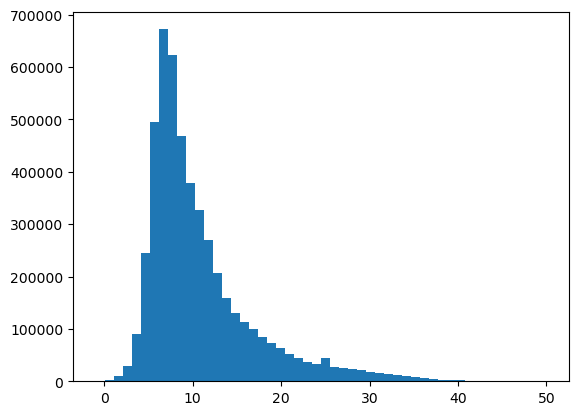

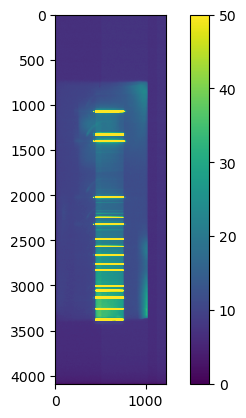

In [43]:
# 2.b)
plt.hist(arc.flatten(), bins=50, range=(-1, 50))
plt.show()

plt.imshow(arc, vmin=-0.1, vmax=50)
plt.colorbar()
plt.show()

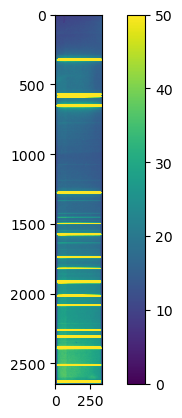

12.0
(2650,)


In [44]:
lim_arc = arc[750:3400, 430:765]

plt.imshow(lim_arc, vmin=-0.1, vmax=50)
plt.colorbar()
plt.show()

arc_1d = np.median(lim_arc, axis=1)
print(np.median(lim_arc[:, 1]))
print(arc_1d.shape)

(array([ 325,  326,  327,  328,  329,  330,  331,  574,  590,  591,  653,
        654,  655,  656,  657,  658,  659,  660, 1276, 1277, 1278, 1279,
       1280, 1574, 1575, 1576, 1577, 1578, 1914, 2392, 2393]),)
[ 2038.5  3502.   5810.   7722.5  5936.5  2302.5  1524.5  1605.5  1602.5
  2660.5  4700.   8764.  13736.5 12911.   5715.   1501.   1474.5  3486.
  6004.5  6158.   3238.   2191.5  4311.   5444.   3764.   1810.   1445.5
  1471.5  1598. ]


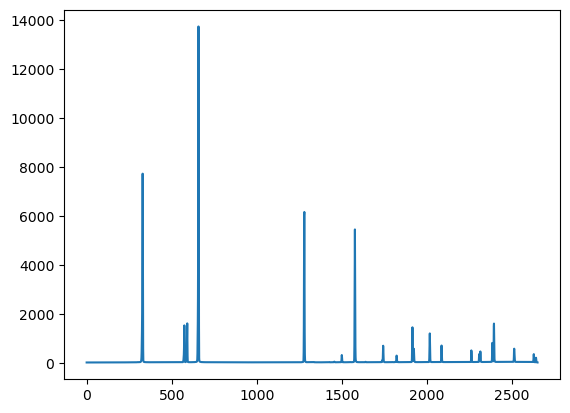

In [45]:
# 2.c)
index=np.arange(len(arc_1d))
# print(arc_1d)

print(np.where(arc_1d>1250))

print(arc_1d[np.where(arc_1d>1400)[0]])

plt.plot(index, arc_1d)
plt.show()

## Step 3

 This is an image from the KAST red measurements of the wavelength lines

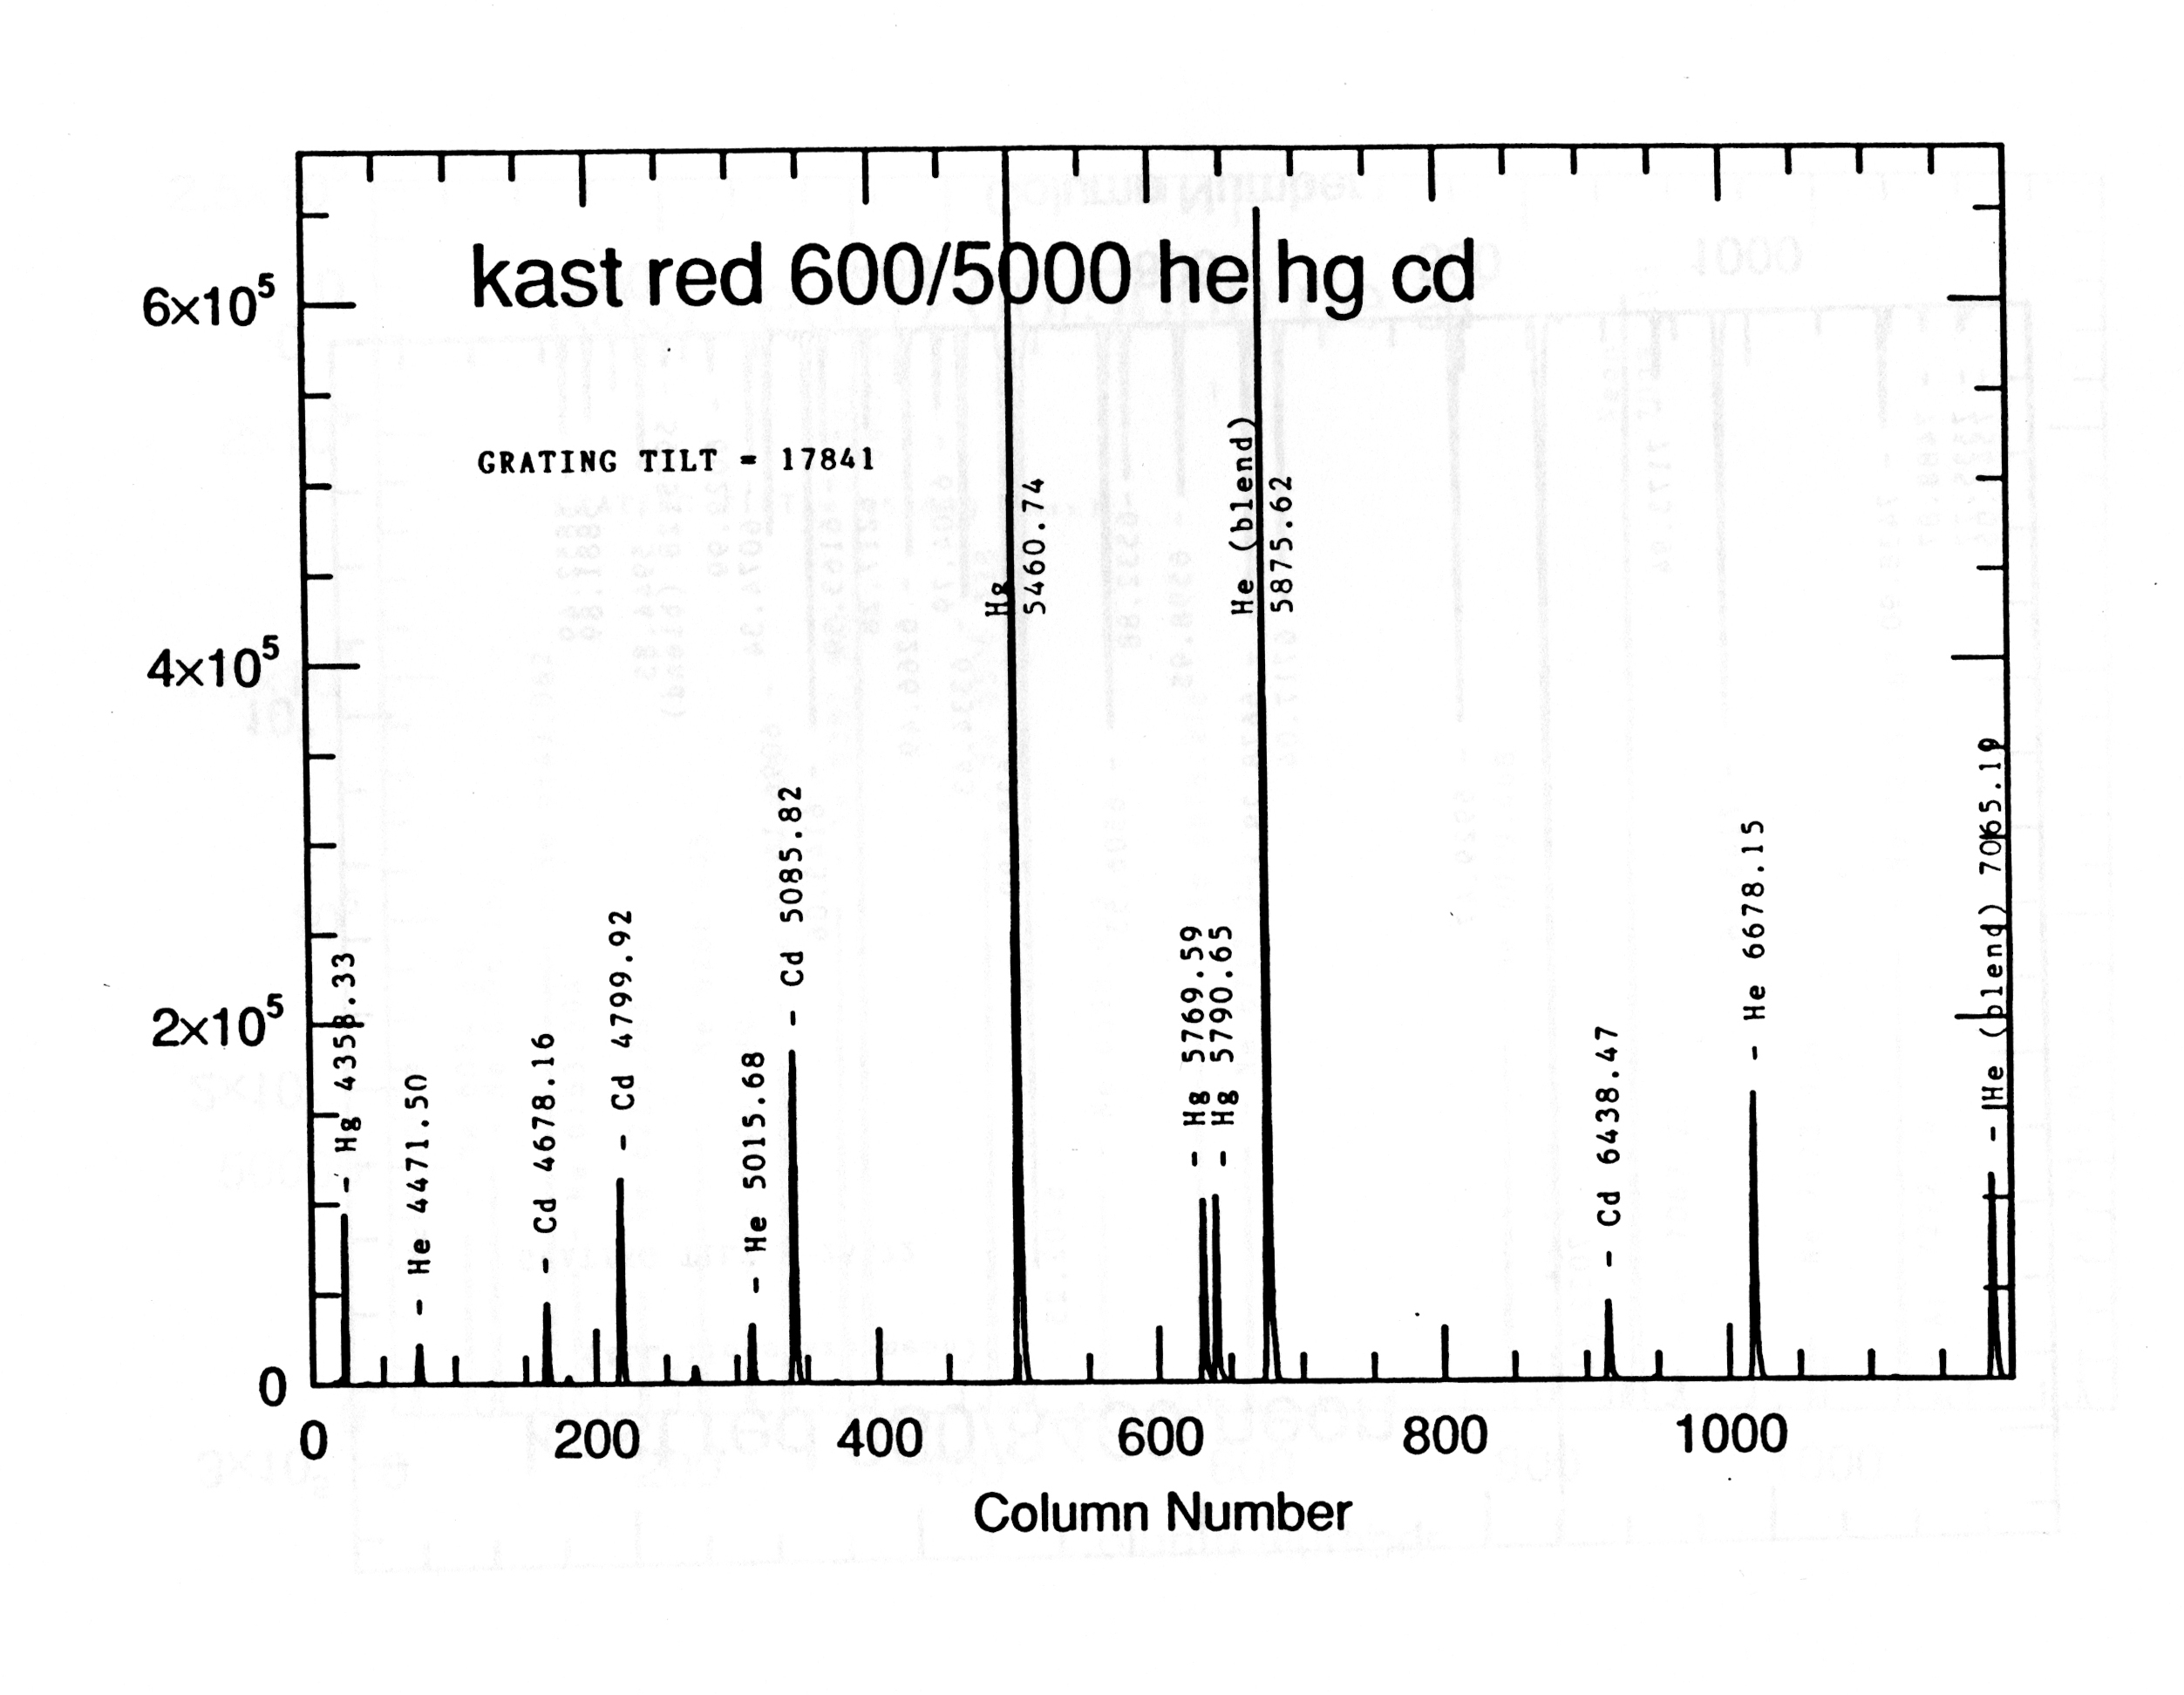

[-2.36558947e-07  5.53937780e-04  9.01614835e-01  5.11376916e+03]
[[ 5.02754554e-15 -1.11836136e-11  7.10840243e-09 -1.31427140e-06]
 [-1.11836136e-11  2.48948153e-08 -1.58415561e-05  2.93370627e-03]
 [ 7.10840243e-09 -1.58415561e-05  1.01011317e-02 -1.87631586e+00]
 [-1.31427140e-06  2.93370627e-03 -1.87631586e+00  3.50304122e+02]]


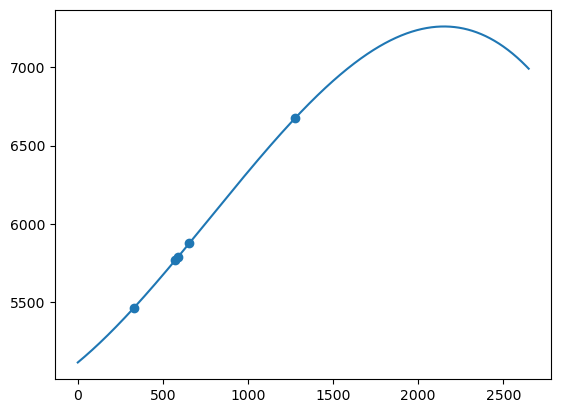

In [46]:
# 3.a)
# Red grating used was 600/7500 neon. 
# Matches 546.074 nm at 328, 576.958 nm at 574, 579.065 nm at 591, 587.562 nm at 655 and, 6678.15 nm at 1279.
wavelength = [5460.74, 5769.58, 5790.65, 5875.62, 6678.15]
pixel_pos = [328, 574, 591, 655, 1279]

# 3.b)
fit_param, fit_cov= np.polyfit(pixel_pos, wavelength, 3, cov=True)
print(fit_param)
print(fit_cov)
poly = np.poly1d(fit_param)

plt.scatter(pixel_pos, wavelength)
plt.plot(index, poly(index))

## Step 4

In [47]:
# Gain correction
gain = 1.9

gal = gal * gain

## Step 5

6676.073927
[-1803.19071518  2867.63140042  1277.20729205]


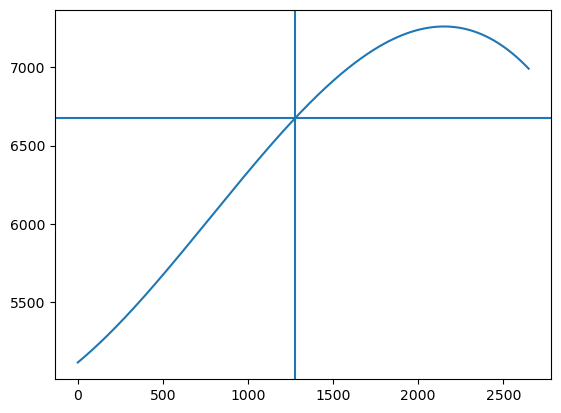

In [48]:
# Computing H-alpha line in our galaxy spectrum using z = v/c = (lam_obs - lam_rest)/(lam_rest)

z = 0.017229

wl_rest = 6563 
wl_obs = wl_rest*z + wl_rest

print(wl_obs)

# position of H-alpha is 1277.207

plt.plot(index, poly(index))
plt.axhline(y=6676.073927)
plt.axvline(x=1277.207)

print((poly-wl_obs).roots)



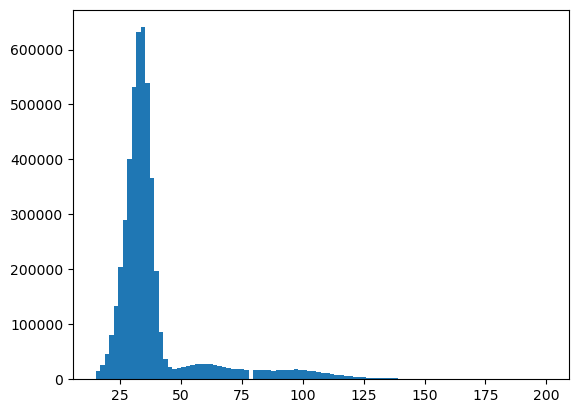

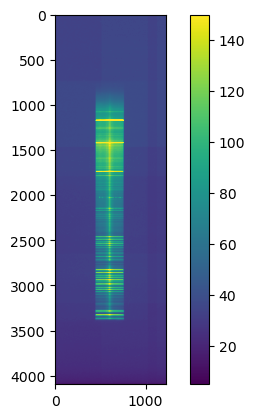

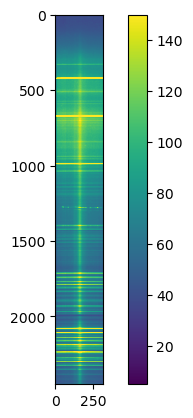

In [49]:
# Plotting the galaxy spectrum
plt.hist(gal.flatten(), bins=100, range=(15, 200))
plt.show()

plt.imshow(gal, vmin=5, vmax=150)
plt.colorbar()
plt.show()

plt.imshow(gal[750:3200, 440:760], vmin=5, vmax=150)
plt.colorbar()
plt.show()

## Step 6

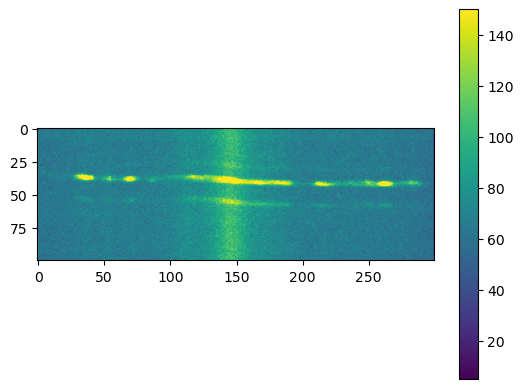

In [50]:
# 6.a)
# identifying a 100 row region around H-alpha spectra
plt.imshow(gal[750+1240:750+1340, 456:756], vmin=5, vmax=150)
plt.colorbar()
plt.show()

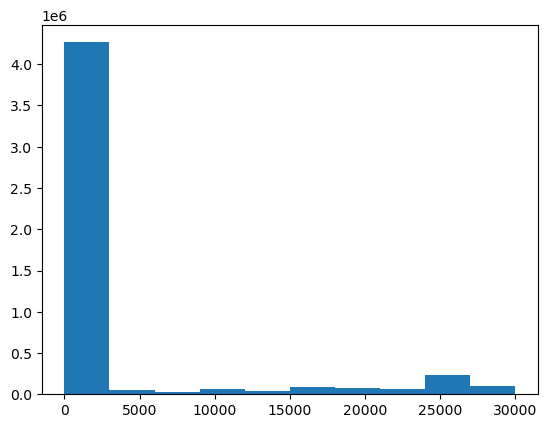

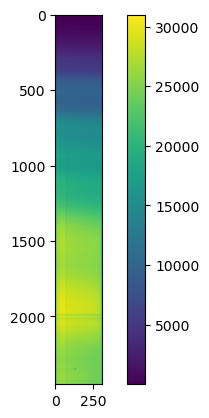

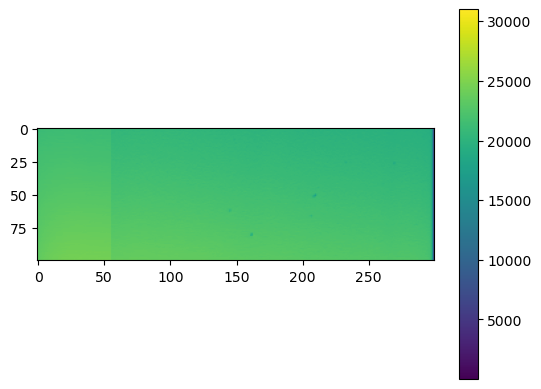

In [51]:
# 6.b) & 6.c)
# flatfielding around galaxy H-alpha spectra
plt.hist(flat.flatten())
plt.show()

plt.imshow(flat[750:3200, 446:756], vmin=5, vmax=31000)
plt.colorbar()
plt.show()


plt.imshow(flat[750+1240:750+1340, 456:756], vmin=5, vmax=31000)
plt.colorbar()
plt.show()

/tmp/ipykernel_434905/2430401654.py:4: RuntimeWarning: divide by zero encountered in divide
  Hgal = gal/Hflat


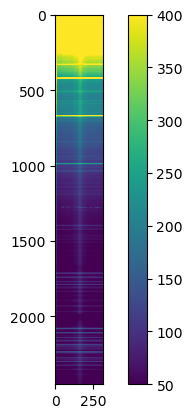

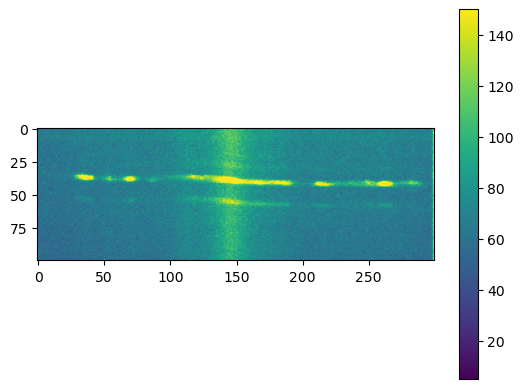

In [52]:
# Normalizing flat and applying to H-alpha
Hflat = flat/np.median(flat[750+1240:750+1340, 446:756])

Hgal = gal/Hflat


plt.imshow(Hgal[750:3200, 440:760], vmin=50, vmax=400)
plt.colorbar()
plt.show()

plt.imshow(Hgal[750+1240:750+1340, 456:756], vmin=5, vmax=150)
plt.colorbar()
plt.show()

# Part 2: Analysis